# Videojuegos más exitosos del 2016

La tienda online Ice vende videojuegos por todo el mundo y está planeando una campaña publicitaria para el 2017. Este análisis se basa en datos históricos sobre las ventas de juegos hasta diciembre 2016.

El propósito de este análisis es identificar patrones que determinen si un juego tiene éxito o no para detectar proyectos prometedores y tener una planificación eficiente de campañas publicitarias.

# Descripción de datos

— Name (Nombre)

— Platform (Plataforma)

— Year_of_Release (Año de lanzamiento)

— Genre (Género) 

— NA_sales (ventas en Norteamérica en millones de dólares estadounidenses) 

— EU_sales (ventas en Europa en millones de dólares estadounidenses) 

— JP_sales (ventas en Japón en millones de dólares estadounidenses) 

— Other_sales (ventas en otros países en millones de dólares estadounidenses) 

— Critic_Score (máximo de 100) 

— User_Score (máximo de 10) 

— Rating (ESRB)

Es posible que los datos de 2016 estén incompletos.

## Inicialización y carga de datos 

In [1]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from scipy import stats as st
from scipy.stats import pearsonr
from IPython.display import display
from scipy.stats import shapiro


In [2]:
# Cargar los datos 
df = pd.read_csv("/datasets/games.csv")

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# Información de Data Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
total_rows = df.shape[0]
total_rows

16715

Con la información del Data Frame, observé lo siguiente:
1. Las columnas Name, Year_of_Release, Genre, Critic_Score, User_Score y Rating contienen valores faltantes.
2. La columna Year_of_Release está en formato float, pero debería ser de tipo int, ya que los años no tienen decimales.
3. La columna User_Score está en formato object, cuando debería ser de tipo float, porque almacena calificaciones numéricas.

## Preparar los datos 

In [6]:
# Reemplazo de nombres de columnas (minúsculas)
df.columns = df.columns.str.lower()

In [7]:
# Convertit los datos en los tipos necesario
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce')
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')


- year_of_release: De texto a tipo numérico (int).Almacena el año de lanzamiento del juego, por lo que debe ser de tipo numérico para facilitar el análisis y el filtrado por años.
- user_score: De texto a tipo numérico (float).Almacena puntuaciones decimales dadas por los usuarios, debe ser númerica para realizar el análisis de forma numérica.

### Valores Ausentes

In [8]:
# Verificar variables con valores asusentes
df.isna().sum()


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [9]:
#Valores ausentes de columna name
df.query('name.isna() == True')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
#Valores ausentes de columna genre
df.query('genre.isna() == True')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
#Eliminar columnas name y genre
df = df.dropna(subset=['name', 'genre'])

En las columnas name y genre faltan 2 valores, lo que indica que no se han registrado el nombre ni el género de dos videojuegos, posiblemente debido a la antigüedad de los mismos, al ser dos valores que tienen NaN en las mismas filas, se eliminan estos valores, porque no son significativos.

In [12]:
#Valores ausentes de columna year_of_release
df['year_of_release'] = df['year_of_release'].fillna(np.nan)

Se mantienen los valores NaN.

In [13]:
#Valores ausentes de columna critic_score 
print('Porcentaje de valores ausentes en la columna "critic_score":', round(8578/total_rows*100,2),'%')
df['critic_score'] = df['critic_score'].fillna(np.nan)


Porcentaje de valores ausentes en la columna "critic_score": 51.32 %


Las filas con valores ausentes en la columna critic_score constituyen el 51.33 %, por lo que no es viable eliminarlas. Además, no se dispone de suficiente información para asignar un valor representativo sin afectar el análisis.Por lo tanto, se sigue considerando la ausencia de datos en esta columna.

In [14]:
#Valores ausentes de columna user_score  
#Asignar el valor NAN a los valores ausentes para continuar el análisis sin errores por tipo de dato
df['user_score'] = df['user_score'].replace('tbd', np.nan).astype(float)
df['user_score'] = df['user_score'].fillna(-1)


In [15]:
print(df['user_score'].isna().sum())

0


Este código mostrará cuántos valores NaN hay en la columna user_score. Si el reemplazo de 'tbd' fue exitoso, el número de valores NaN debería coincidir con la cantidad de veces que 'tbd' estaba presente en esa columna.

In [16]:
# Verificar cuántos valores -1 hay en la columna 'user_score'
print((df['user_score'] == -1).sum())

9123


Rellena los valores NaN en la columna user_score con -1, lo que representa que la puntuación no ha sido determinada (esto también puede ser útil para hacer análisis sin que los valores ausentes afecten).

In [17]:
#Valores ausentes de columna rating  
print('Porcentaje de valores ausentes en la columna "rating":', round(6766/total_rows*100,2),'%')

Porcentaje de valores ausentes en la columna "rating": 40.48 %


In [18]:
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

In [19]:
df['rating'].sort_values().unique()


array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

La columna rating cuenta con los siquientes valores:

- E (todos)
- EC (mayores de 3 años) dejó de usarse en 2018 y se reemplazó con E
- E10+ (mayores de 10 años)
- K-A (mayores de 10 años) dejó de usarse en 1998 y se reemplazó con E10+
- T (mayores de 13 años)
- M (mayores de 17 años)
- A0 (sólo para adultos de 18 años en adelante)
- P (pendiente de clasificar)

In [20]:
#Asignar el valor unknown a los valores ausentes
df['rating'] = df['rating'].fillna("RP")

Se establecen los valores ausentes de la columna rating como RP, es decir, pendiente de clasificar (Rating Pending)

### Valores Duplicados 

In [21]:
# Contar el número total de filas duplicadas en el DataFrame
num_duplicados =df.duplicated().sum()

print(f"Número total de filas duplicadas: {num_duplicados}")

Número total de filas duplicadas: 0


No hay valores duplicados dentro del Data Frame. 

### Ventas Totales

In [22]:
# Cálculo de ventas totales
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']


In [23]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,-1.0,RP,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,-1.0,RP,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,-1.0,RP,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,-1.0,RP,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,-1.0,RP,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,-1.0,RP,0.01


## Análisis de Datos 

### Juegos Lanzados por Año

In [24]:
lanzamientos_por_año = df['year_of_release'].value_counts().sort_index()
lanzamientos_por_año

1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: year_of_release, dtype: int64

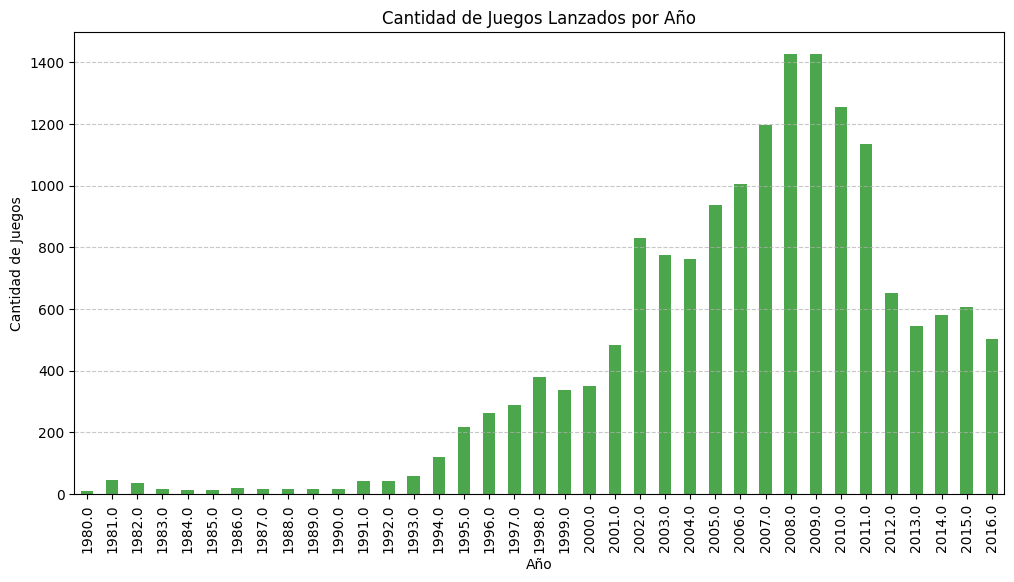

In [25]:
#Realizamos un gráfico de barras para determinar la significancia.
plt.figure(figsize=(12, 6))
lanzamientos_por_año.plot(kind='bar', color='green', alpha=0.7)
plt.title('Cantidad de Juegos Lanzados por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Juegos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Según el gráfico de barras, hay un aumento significativo d elos juegos desde el año 2005, la racha se mantiene hasta el año 2011, la mayor cantidad de juegos lanzados fueron en los años 2008 y 2009.

### Ventas por Plataforma

#### Plataformas con mayores ventas totales

In [26]:
ventas_por_plataforma = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
ventas_por_plataforma

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

In [27]:
# Filtrar solo los primeros 5 valores (plataformas con mayores ventas)
top_5_plataformas = ventas_por_plataforma.head(5)
# Mostrar el resultado
print(top_5_plataformas)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: total_sales, dtype: float64


Las plataformas con mayores ventas son: PS2,X360,PS3,Wii,DS , en base a estas plataformas realizaremos visulizaciones de su comportamiento a lo largo de los años para su análisis.    

### Ventas por año de cada Plataforma

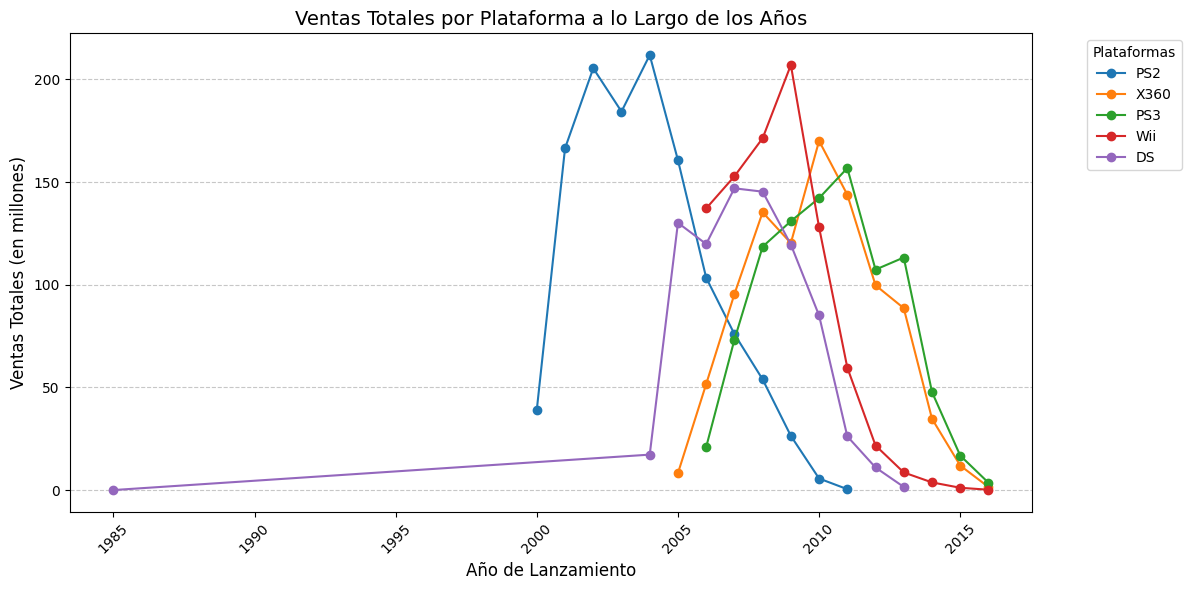

In [28]:
# Filtrar los datos para incluir solo las plataformas del top 5
ventas_top_5_plataformas = df[df['platform'].isin(top_5_plataformas.index)]

# Agrupar por plataforma y año, sumando las ventas
ventas_plataformas_por_año = ventas_top_5_plataformas.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))

# Graficar las ventas por plataforma a lo largo de los años
for plataforma in top_5_plataformas.index:
    plataforma_data = ventas_plataformas_por_año[ventas_plataformas_por_año['platform'] == plataforma]
    plt.plot(plataforma_data['year_of_release'], plataforma_data['total_sales'], marker='o', label=plataforma)

# Personalizar el gráfico
plt.title('Ventas Totales por Plataforma a lo Largo de los Años', fontsize=14)
plt.xlabel('Año de Lanzamiento', fontsize=12)
plt.ylabel('Ventas Totales (en millones)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Plataformas", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Según los datos, de las plataformas top 5 la única que existia a partir de 1985 (DS) tuvo su auge desde el 2004, pero sus ventas fueron disminuyendo y no llega al 2015, a pesar de ser una de las primeras plataformas que aparece. La plataforma que mayores ventas ha tenido y por ende la más popular es (PS2), pero de igual forma con los años fue en declive. Las únicas plataformas dentro de este top 5 que se han mantenido en el mercado son Wii, PS3 y X360.

### Plataformas activas y desaparecidas

In [29]:
# Agrupar por plataforma y año, sumando las ventas de cada año
ventas_plataformas_por_año = df.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

# Calcular el año de inicio y fin de ventas para cada plataforma
años_ventas_plataformas = ventas_plataformas_por_año.groupby('platform').agg(
    inicio_ventas=('year_of_release', 'min'),
    fin_ventas=('year_of_release', 'max')
).reset_index()

# Eliminar decimales de los años (convertir a enteros)
años_ventas_plataformas['inicio_ventas'] = años_ventas_plataformas['inicio_ventas'].astype(int)
años_ventas_plataformas['fin_ventas'] = años_ventas_plataformas['fin_ventas'].astype(int)

# Calcular la duración en años
años_ventas_plataformas['años_duracion'] = años_ventas_plataformas['fin_ventas'] - años_ventas_plataformas['inicio_ventas'] + 1

# Revisar plataformas que ya no tienen ventas en los últimos años
ultimo_año = int(df['year_of_release'].max())
años_ventas_plataformas['desaparecida'] = años_ventas_plataformas['fin_ventas'] < ultimo_año

# Separar plataformas desaparecidas y no desaparecidas
plataformas_desaparecidas = años_ventas_plataformas[años_ventas_plataformas['desaparecida'] == True]
plataformas_activas = años_ventas_plataformas[años_ventas_plataformas['desaparecida'] == False]

# Calcular las ventas totales de cada plataforma
ventas_totales_por_plataforma = ventas_plataformas_por_año.groupby('platform')['total_sales'].sum().reset_index()

# Añadir la columna de ventas totales al DataFrame de plataformas activas
plataformas_activas = plataformas_activas.merge(ventas_totales_por_plataforma, on='platform')

# Ordenar las plataformas activas por ventas totales en orden descendente
plataformas_activas = plataformas_activas.sort_values(by='total_sales', ascending=False)

# Ordenar las plataformas desaparecidas por el año de fin de ventas en orden descendente
plataformas_desaparecidas = plataformas_desaparecidas.sort_values(by='fin_ventas', ascending=False)

# Mostrar los resultados
print("Plataformas desaparecidas:")
print(plataformas_desaparecidas)

print("\nPlataformas activas:")
print(plataformas_activas)


Plataformas desaparecidas:
   platform  inicio_ventas  fin_ventas  años_duracion  desaparecida
19      PSP           2004        2015             12          True
4        DS           1985        2013             29          True
16      PS2           2000        2011             12          True
29       XB           2000        2008              9          True
3        DC           1998        2008             11          True
6       GBA           2000        2007              8          True
7        GC           2001        2007              7          True
15       PS           1994        2003             10          True
10      N64           1996        2002              7          True
5        GB           1988        2001             14          True
25       WS           1999        2001              3          True
23     SNES           1990        1999             10          True
21      SAT           1994        1999              6          True
12       NG          

In [30]:
# Calcular el promedio de duración de las plataformas desaparecidas
promedio_duracion_desaparecidas = plataformas_desaparecidas['años_duracion'].mean()
print(f"El promedio de duración de las plataformas desaparecidas es de {promedio_duracion_desaparecidas:.2f} años.")


El promedio de duración de las plataformas desaparecidas es de 8.00 años.


- **¿Cuánto tardan las nuevas plataformas en aparecer?**
La primera plataforma en los datos apareció en 1980 (2600).Desde entonces, nuevas plataformas han aparecido regularmente, con un promedio de aproximadamente 1 a 2 años entre la llegada de una plataforma nueva y la siguiente.

- **¿Cuánto tardan las plataformas antiguas en desaparecer?**
Calculamos la duración promedio (columna años_duracion) de las plataformas desaparecidas:
La duración promedio es de 8 años.Las plataformas más longevas incluyen:DS: 29 años (1985–2013).PCFX y TG16 tuvieron las vidas más cortas, de apenas 1 año.

La mayoría de las plataformas que ya no están activas duraron menos de 10 años. Las plataformas activas muestran que los ciclos de renovación se están haciendo más cortos en comparación con las plataformas más antiguas las nuevas plataformas suelen aparecer en promedio cada 1-2 años. Plataformas antiguas generalmente tardan unos 8 años en desaparecer desde su lanzamiento, lo que indica un ciclo de vida estándar para muchas plataformas en el mercado de videojuegos.

### Construcción modelo 2017

Para la construcción de este modelo se debería tomar las plataformas que se encuentran activas hasta el año 2016, que es hasta el año donde se encuentran los registros en este DataFrame, conforme al análisis realizado hasta ahora considero que se debería realizar la proyección desde el periódo 2005 a 2016, porque en el año 2005 aparece la plataforma X360 y es la que tiene  el mayor nivel de ventas $ 961.24 millones de dólares, sin embargo para asegurar este periodo veamos que niveles alcanzó esta plataforma en este periodo (2005-2016)para ver si son ventas significativas, de otro modo podemos optar por un periodo más actualizado, para mejorar la calidad del análisis. 

In [31]:
# Filtrar los datos para la plataforma X360 y años entre 2005 y 2016
ventas_x360 = df[(df['platform'] == 'X360') & (df['year_of_release'] >= 2005) & (df['year_of_release'] <= 2016)]

# Calcular el promedio de ventas y la desviación estándar
promedio_ventas = ventas_x360['total_sales'].mean()
desviacion_estandar = ventas_x360['total_sales'].std()

# Mostrar el promedio de ventas y la desviación estándar
print(f"Promedio de ventas de X360 entre 2005 y 2016: {promedio_ventas}")
print(f"Desviación estándar de las ventas de X360 entre 2005 y 2016: {desviacion_estandar}")

# Definir un umbral como el promedio más 1 desviación estándar
umbral_superior = promedio_ventas + desviacion_estandar

# Identificar los años en que las ventas superan el umbral
años_significativos = ventas_x360[ventas_x360['total_sales'] > umbral_superior]

# Mostrar el primer año en que las ventas superan el umbral
primer_año_significativo = años_significativos['year_of_release'].min()
print(f"El primer año en que las ventas de X360 superan el promedio más 1 desviación estándar es: {primer_año_significativo}")


Promedio de ventas de X360 entre 2005 y 2016: 0.7802272727272729
Desviación estándar de las ventas de X360 entre 2005 y 2016: 1.6321223434284788
El primer año en que las ventas de X360 superan el promedio más 1 desviación estándar es: 2006.0


Se realizaron los siguientes pasos para determinar estos datos: 
1. Calcular el promedio de ventas (media) de X360 durante el periodo de 2005 a 2016.
2. Calcular la desviación estándar de las ventas de X360 en el mismo período.
3. Comparar las ventas de cada año con el promedio, sumando la desviación estándar para definir qué es "significativo".
Identificar el primer año significativo, es decir, el primer año en que las ventas superan el promedio + (desviación estándar).Este año fue el 2006 así que nuestro periódo de análisis se tomará de 2006 a 2016, con las plataformas que se encuentran activas.

#### Plataformas Líderes en Ventas 

Se toma en cuenta el periodo ya establecido y se filtran los datos.

In [32]:
# Filtrar las plataformas que hayan tenido ventas en algún momento entre 2006 y 2016
plataformas_activas_2006_2016 = plataformas_activas[
    (plataformas_activas['inicio_ventas']>= 2006 ) & (plataformas_activas['fin_ventas']<= 2016)
]

# Verificar los datos después del filtrado
print("Plataformas activas entre 2006 y 2016:")
print(plataformas_activas_2006_2016[['platform', 'inicio_ventas', 'fin_ventas']])

# Filtrar y agrupar por plataforma, sumando las ventas totales
# Asegúrate de que la columna 'total_sales' exista en el DataFrame
plataformas_lideres = plataformas_activas_2006_2016.groupby('platform')['total_sales'].sum().reset_index()

# Ordenar las plataformas por ventas totales de mayor a menor (ventas descendentes)
plataformas_lideres = plataformas_lideres.sort_values(by='total_sales', ascending=False)

# Mostrar las plataformas líderes en ventas ordenadas de mayor a menor
print("\nPlataformas líderes en ventas entre 2006 y 2016 :")
print(plataformas_lideres)


Plataformas activas entre 2006 y 2016:
  platform  inicio_ventas  fin_ventas
2      PS3           2006        2016
5      Wii           2006        2016
3      PS4           2013        2016
0      3DS           2011        2016
8     XOne           2013        2016
6     WiiU           2012        2016
4      PSV           2011        2016

Plataformas líderes en ventas entre 2006 y 2016 :
  platform  total_sales
1      PS3       931.34
4      Wii       891.18
2      PS4       314.14
0      3DS       257.81
6     XOne       159.32
5     WiiU        82.19
3      PSV        53.81


Las plataformas líderes en ventas son PS3, Wii, PS4, 3DS, X0ne, estos conforman el top 5. 

#### Plaformas que crecen y decrecen

In [33]:
# Filtrar las plataformas activas
plataformas_activas_nombres = plataformas_activas['platform']

# Filtrar el DataFrame original para incluir solo las plataformas activas y los años de 2006 a 2016
df_filtered = df[(df['year_of_release'] >= 2006) & (df['year_of_release'] <= 2016) & (df['platform'].isin(plataformas_activas_nombres))]

# Agrupar por año y plataforma, sumando las ventas totales
df_ventas_totales = df_filtered.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

# Ordenar los resultados por año y plataforma para claridad
df_ventas_totales = df_ventas_totales.sort_values(by=['year_of_release', 'platform'])

# Mostrar las ventas totales por plataforma y por año
print(df_ventas_totales)


    year_of_release platform  total_sales
0            2006.0       PC         2.85
1            2006.0      PS3        20.96
2            2006.0      Wii       137.15
3            2006.0     X360        51.62
4            2007.0       PC         9.28
..              ...      ...          ...
64           2016.0      PSV         4.25
65           2016.0      Wii         0.18
66           2016.0     WiiU         4.60
67           2016.0     X360         1.52
68           2016.0     XOne        26.15

[69 rows x 3 columns]


In [34]:
# Calcular la diferencia de ventas entre el primer y el último año para cada plataforma
df_ventas_totales_first_last = df_ventas_totales.groupby('platform').agg(
    first_year_sales=('total_sales', 'first'),  # Ventas del primer año
    last_year_sales=('total_sales', 'last')    # Ventas del último año
).reset_index()

# Calcular la diferencia de ventas
df_ventas_totales_first_last['sales_difference'] = df_ventas_totales_first_last['last_year_sales'] - df_ventas_totales_first_last['first_year_sales']

# Determinar si las ventas han crecido o decrecido
df_ventas_totales_first_last['growth_status'] = df_ventas_totales_first_last['sales_difference'].apply(
    lambda x: 'Creció' if x > 0 else ('Decreció' if x < 0 else 'Estable')
)

# Mostrar las plataformas con su diferencia de ventas y el estado de crecimiento
print(df_ventas_totales_first_last[['platform', 'sales_difference', 'growth_status']])


  platform  sales_difference growth_status
0      3DS            -48.06      Decreció
1       PC              2.40        Creció
2      PS3            -17.36      Decreció
3      PS4             43.26        Creció
4      PSV             -0.38      Decreció
5      Wii           -136.97      Decreció
6     WiiU            -12.96      Decreció
7     X360            -50.10      Decreció
8     XOne              7.19        Creció


Las plataformas más modernas, como PS4 y XOne, han demostrado un crecimiento constante durante el período 2006-2016, lo que refleja una preferencia por las consolas de nueva generación que ofrecen mejor rendimiento y una experiencia de juego más avanzada. Las plataformas más antiguas o menos innovadoras, como la Wii y la PS3, han experimentado un declive considerable, lo que es esperado debido al ciclo de vida de los productos y el reemplazo por nuevas generaciones.
Las plataformas portátiles como 3DS y PSV también han mostrado caídas. 

- 3DS (Decreció): La 3DS experimentó una caída significativa de 48.06 millones de dólares. 
- PS3 (Decreció): La PS3 mostró una disminución de 17.36 millones de dólares. Aunque la PS3 fue una plataforma muy exitosa durante su vida útil, el declive en ventas es esperable después del lanzamiento de su sucesora, la PS4, que atrajo la atención del público y de los desarrolladores de videojuegos.
- PSV (Decreció): La PS Vita sufrió una ligera caída en ventas con 0.38 millones de dólares. La PS Vita, una consola portátil de Sony, tuvo problemas para competir con otras plataformas portátiles y no logró captar tanto mercado, lo que se refleja en el decrecimiento.
- Wii (Decreció): La Wii, aunque fue extremadamente popular en su tiempo, experimentó una caída drástica de 136.97 millones de dólares. Este declive es comprensible dado que fue reemplazada por la Wii U, y más tarde por consolas más potentes.
- WiiU (Decreció): La Wii U también mostró una caída de 12.96 millones de dólares. La Wii U fue un fracaso comercial comparado con su predecesora, la Wii, debido a su limitada base de jugadores y la confusión sobre su nombre, lo que afectó negativamente las ventas.
- X360 (Decreció): La Xbox 360 mostró una disminución significativa de 50.10 millones de dólares. Similar a la PS3, el lanzamiento de la Xbox One probablemente contribuyó a este decrecimiento, ya que los jugadores migraron a la nueva consola más moderna.

#### Plataformas a nivel global

Primero filtramos la base completa de nuestro interés que son las plataformasa activas del periodo 2006 al 2016. 

In [35]:
# Filtrar el DataFrame usando la variable plataformas_activas_nombres
df_filtered = df[
    (df['platform'].isin(plataformas_activas_nombres)) &  # Usar directamente la variable
    (df['year_of_release'] >= 2006) &                     # Filtrar por rango de años
    (df['year_of_release'] <= 2016)                       # Hasta 2016
]

# Ver las primeras filas del DataFrame filtrado
df_filtered


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
...,...,...,...,...,...,...,...,...,...,...,...,...
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,-1.0,RP,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,-1.0,RP,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,-1.0,RP,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,-1.0,RP,0.01


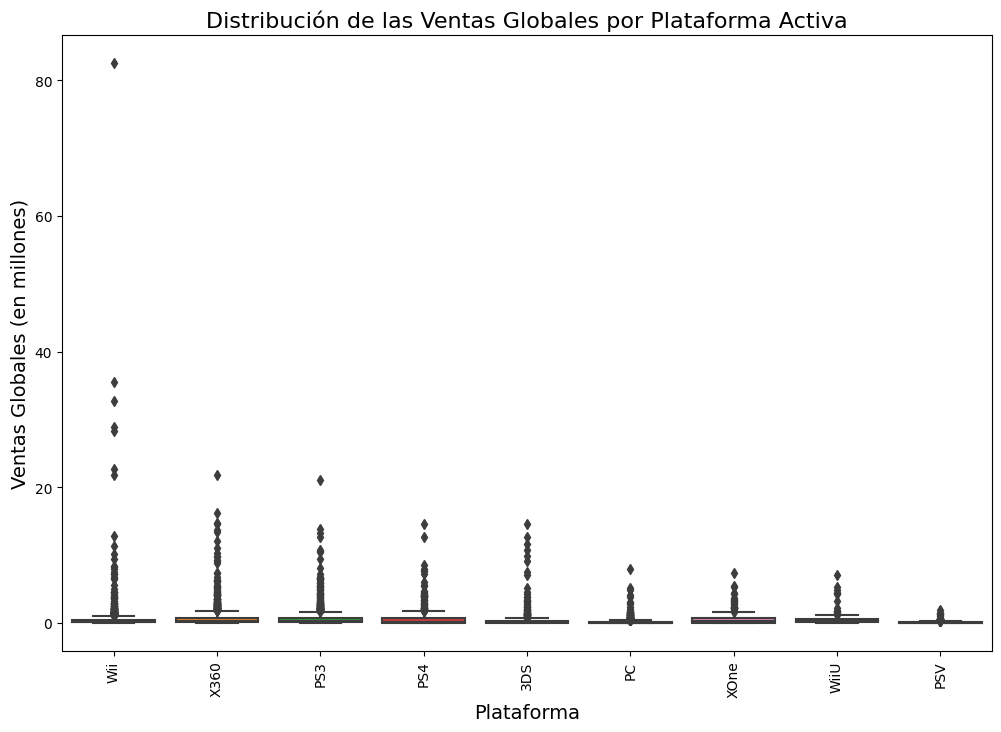

In [36]:
# Crear un diagrama de caja para las ventas globales, desglosadas por plataforma activa
plt.figure(figsize=(12, 8))
sns.boxplot(x='platform', y='total_sales', data=df_filtered)

# Añadir títulos y etiquetas
plt.title('Distribución de las Ventas Globales por Plataforma Activa', fontsize=16)
plt.xlabel('Plataforma', fontsize=14)
plt.ylabel('Ventas Globales (en millones)', fontsize=14)
plt.xticks(rotation=90)  # Rotar los nombres de las plataformas para mejor legibilidad
plt.show()



In [37]:
# Calcular la media de las ventas por plataforma activa y ordenarlas de manera descendente
ventas_promedio = df_filtered.groupby('platform')['total_sales'].mean().sort_values(ascending=False)

# Mostrar las ventas promedio por plataforma ordenadas
print("Ventas promedio por plataforma activa:")
print(ventas_promedio)


Ventas promedio por plataforma activa:
platform
PS4     0.801378
X360    0.785000
PS3     0.713124
Wii     0.692986
XOne    0.645020
WiiU    0.559116
3DS     0.503535
PC      0.210593
PSV     0.125431
Name: total_sales, dtype: float64


**Plataformas con mayores ventas promedio:**
La PS4 lidera con un promedio de ventas globales de 0.801 millones por juego, destacándose como la plataforma más rentable en términos de promedio. Le siguen X360 (0.79 millones) y PS3 (0.71 millones), lo que demuestra la fuerte presencia de las consolas de Microsoft y Sony en este periodo.

**Plataformas con menores ventas promedio:**
La PSV (PlayStation Vita) tiene el promedio de ventas más bajo, con solo 0.126 millones por título. Esto indica una menor aceptación en comparación con otras plataformas de su generación.
PC también presenta un promedio bajo de 0.266 millones, lo que podría reflejar la diversidad del mercado de PC y su menor dependencia de ventas unitarias de juegos.
Plataformas de Nintendo:

Wii se encuentra en una posición intermedia con un promedio de 0.688 millones, lo que refleja su éxito en términos de títulos vendidos globalmente, aunque no supera a las consolas de Sony y Microsoft.
WiiU (0.559 millones) y 3DS (0.503 millones) tienen promedios más bajos, lo que sugiere que no lograron replicar el éxito masivo de la Wii.Aunque el promedio de ventas de juegos de PC es bajo, esto podría deberse a la gran cantidad de títulos lanzados en esta plataforma, donde las ventas están más distribuidas y menos concentradas en éxitos específicos.


### Reseñas de usuarios y profesionales

Analizaremos las reseñas de usuarios y profesionales y ver cómo afectan las ventas de una plataforma PS4.

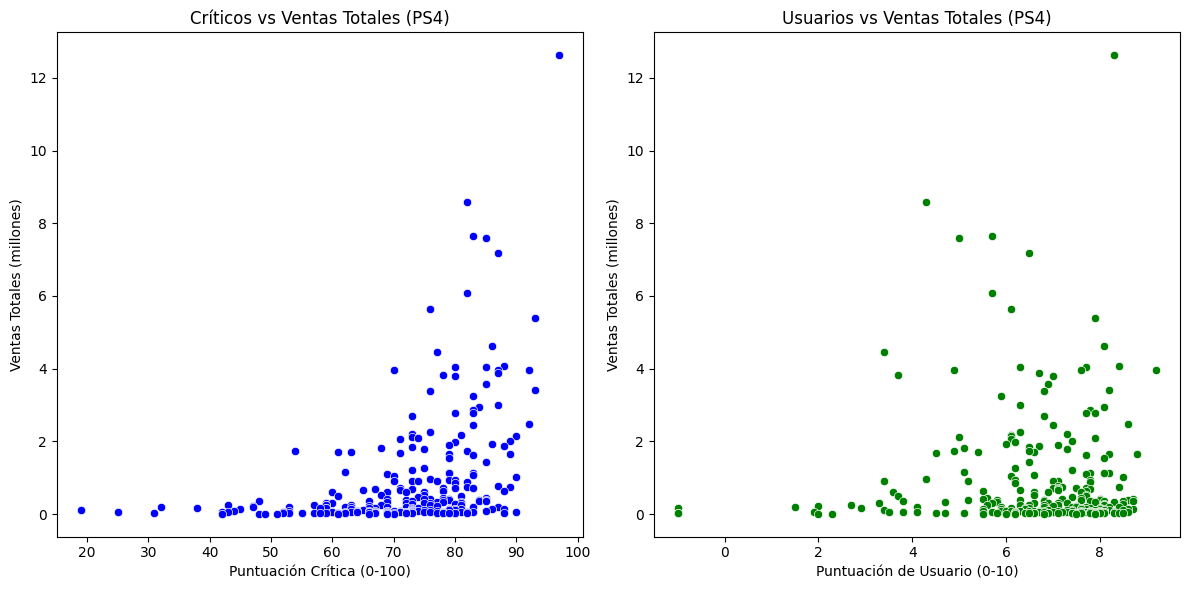

In [38]:
# Filtrar los datos para la plataforma PS4
df_ps4 = df_filtered[df_filtered['platform'] == 'PS4']

# Eliminar filas con valores nulos en las columnas relevantes
df_ps4 = df_ps4.dropna(subset=['critic_score', 'user_score', 'total_sales'])

# Crear un gráfico de dispersión entre las reseñas de críticos, usuarios y las ventas totales
plt.figure(figsize=(12, 6))

# Subgráfico 1: Crítico vs Ventas Totales
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_ps4, x='critic_score', y='total_sales', color='blue')
plt.title('Críticos vs Ventas Totales (PS4)')
plt.xlabel('Puntuación Crítica (0-100)')
plt.ylabel('Ventas Totales (millones)')

# Subgráfico 2: Usuario vs Ventas Totales
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_ps4, x='user_score', y='total_sales', color='green')
plt.title('Usuarios vs Ventas Totales (PS4)')
plt.xlabel('Puntuación de Usuario (0-10)')
plt.ylabel('Ventas Totales (millones)')

plt.tight_layout()
plt.show()

In [39]:
# Calcular las correlaciones entre las reseñas y las ventas
correlation_critic_sales = df_ps4['critic_score'].corr(df_ps4['total_sales'])
correlation_user_sales = df_ps4['user_score'].corr(df_ps4['total_sales'])

print("Correlación entre críticas y ventas: ", correlation_critic_sales)
print("Correlación entre usuarios y ventas: ", correlation_user_sales)

Correlación entre críticas y ventas:  0.40656790206178095
Correlación entre usuarios y ventas:  0.0012601639682130487


**1. Correlación entre críticas y ventas (0.41):**
La correlación positiva de 0.41 entre las puntuaciones de los críticos y las ventas totales indica una relación moderadamente positiva. En general, los juegos con mejores críticas tienden a tener mayores ventas en la plataforma PS4. Sin embargo, la correlación no es muy alta, lo que implica que otros factores también juegan un papel importante en las ventas, no solo las críticas.

**2. Correlación entre puntuaciones de usuarios y ventas (0.001):**
La correlación de 0.001 entre las puntuaciones de los usuarios y las ventas totales es extremadamente baja, casi nula. Esto sugiere que, en este conjunto de datos, las reseñas de los usuarios no parecen tener un impacto significativo en las ventas totales de los juegos en la PS4. Esto puede indicar que los usuarios pueden no basarse tanto en las puntuaciones promedio para tomar sus decisiones de compra, o que hay otros factores más influyentes.

### Ventas de Juegos en distintas plataformas

Se analizan las ventas del mismo juego en distintas plataformas.



In [40]:
# Filtrar los datos para la plataforma X360
df_X360  = df_filtered[df_filtered['platform'] == 'X360']
df_X360.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
32,Call of Duty: Black Ops,X360,2010.0,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
36,Call of Duty: Modern Warfare 2,X360,2009.0,Shooter,8.52,3.59,0.08,1.28,94.0,6.3,M,13.47
44,Halo 3,X360,2007.0,Shooter,7.97,2.81,0.13,1.21,94.0,7.8,M,12.12
51,Grand Theft Auto IV,X360,2008.0,Action,6.76,3.07,0.14,1.03,98.0,7.9,M,11.00
60,Call of Duty: Ghosts,X360,2013.0,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
64,Halo: Reach,X360,2010.0,Shooter,7.04,1.95,0.08,0.79,91.0,7.9,M,9.86


Eleji el juego Call of Duty: Ghosts, para analizar las ventas en las pltaformas X360 y PS3.

In [41]:
# Filtrar los datos para "Call of Duty: Ghosts" en las plataformas X360 y PS3
cod_call_black = df_filtered[
    (df_filtered['name'] == 'Call of Duty: Ghosts') & 
    (df_filtered['platform'].isin(['X360', 'PS3']))
]

# Mostrar los resultados en una tabla
cod_call_black[['name', 'platform', 'total_sales']]


,name,platform,total_sales
60,Call of Duty: Ghosts,X360,10.24
69,Call of Duty: Ghosts,PS3,9.36


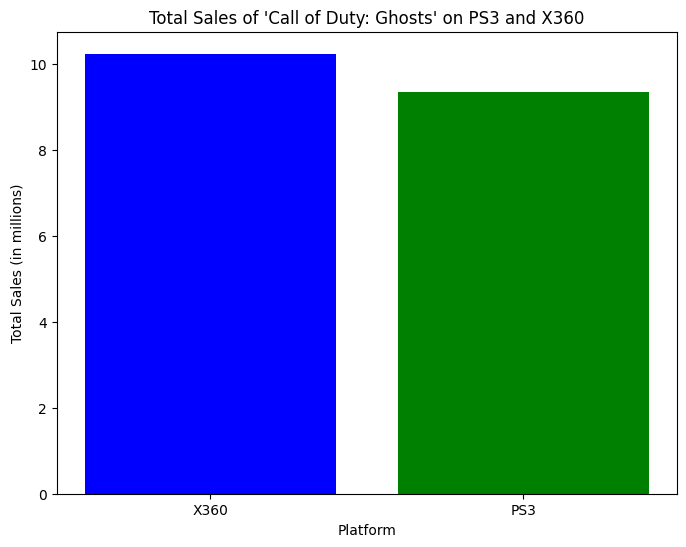

In [42]:
# Obtener los valores para las plataformas y las ventas
platforms = cod_call_black['platform']
sales = cod_call_black['total_sales']

# Crear gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(platforms, sales, color=['blue', 'green'])

# Añadir título y etiquetas
plt.title("Total Sales of 'Call of Duty: Ghosts' on PS3 and X360")
plt.xlabel("Platform")
plt.ylabel("Total Sales (in millions)")

# Mostrar el gráfico
plt.show()

El juego "Call of Duty: Ghosts" tuvo mayores ventas en la plataforma X360 (10.24 millones) en comparación con la PS3 (9.36 millones). Esto podría indicar que el público en esta plataforma estuvo más interesado o tuvo más acceso al juego.
La diferencia de ventas entre ambas plataformas es de $ 0.88 millones, lo que no es una diferencia pequeña.Sin embargo, la diferencia sugiere que, en este caso, X360 tiene una ligera ventaja en términos de ventas, hay que tomar en cuenta que esta plataforma aparecio un año antes que PS3.
Es posible que los usuarios de X360 tuvieran una mayor cantidad de jugadores activos en esa época en comparación con PS3, lo cual impacta las ventas.No se debe olvidar que las ventas pueden depender de muchos factores: el marketing, la disponibilidad del juego en las tiendas, la percepción de la calidad del juego en cada consola, o incluso el ciclo de vida de la consola.

### Distribución General de los juegos por género 

Analizaremos cuales son los géneros más rentables y cuales de estos tiene las ventas más altas y más bajas. 

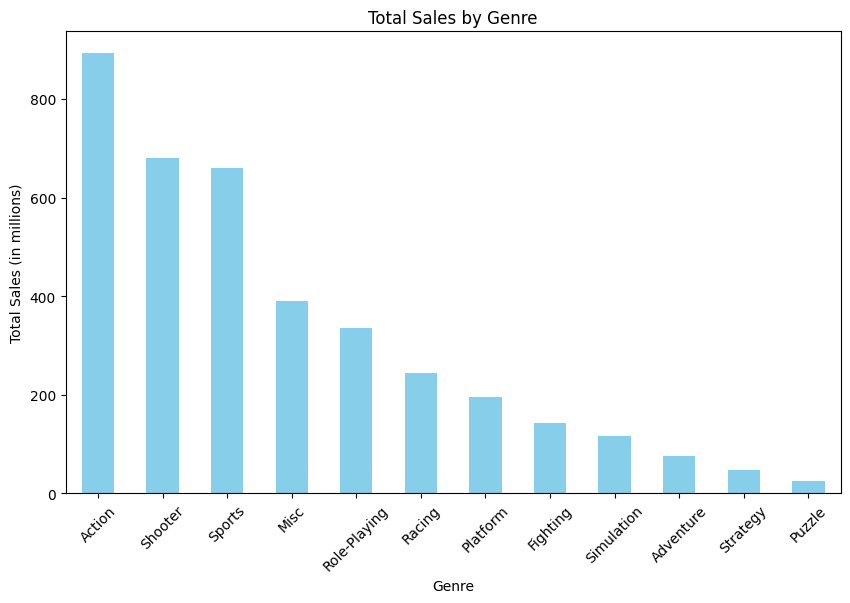

In [43]:
# Agrupar por género y calcular las ventas totales
genre_sales = df_filtered.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
genre_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.show()


Los géneros con mayores ventas son Action , Shootern y Spots. Los que tiene menos ventas son Adventure , Strategy y Puzzle, por ende, los más rentables on los que tienen ventas mayores. Algunas generalidades que se puede tomar en cuenta son que los géneros más rentables suelen ser los que apelan a una audiencia amplia y tienen una jugabilidad accesible o repetitiva (como los juegos de acción, deportes y disparos).
Los géneros menos rentables tienden a ser aquellos que atraen a un público más específico o con mecánicas de juego que requieren un mayor compromiso y dedicación, como simuladores y juegos de estrategia.

## Perfil de usuario para cada región

El siguiente análisis se realizará por región (NA, UE, JP), para determinar:

- Las cinco plataformas principales. Las variaciones en sus cuotas de mercado de una región a otra.
- Los cinco géneros principales.
- Las clasificaciones de ESRB afectan a las ventas en regiones individuales.

### Cinco plataformas principales por región con cuotas de mercado

In [44]:
# Agrupar por plataforma y región (NA, EU, JP)
platform_sales = df_filtered.groupby(['platform'])[['na_sales', 'eu_sales', 'jp_sales', 'total_sales']].sum()

# Calcular las cuotas de mercado por región
platform_sales['na_market'] = platform_sales['na_sales'] / platform_sales['na_sales'].sum() * 100
platform_sales['eu_market'] = platform_sales['eu_sales'] / platform_sales['eu_sales'].sum() * 100
platform_sales['jp_market'] = platform_sales['jp_sales'] / platform_sales['jp_sales'].sum() * 100

# Ordenar las plataformas por región
top_platforms_na = platform_sales.sort_values(by='na_market', ascending=False).head(5)
top_platforms_eu = platform_sales.sort_values(by='eu_market', ascending=False).head(5)
top_platforms_jp = platform_sales.sort_values(by='jp_market', ascending=False).head(5)

# Mostrar resultados como tablas
print("Top 5 plataformas en Norteamérica:")
display(top_platforms_na[['na_market']])

print("Top 5 plataformas en Europa:")
display(top_platforms_eu[['eu_market']])

print("Top 5 plataformas en Japón:")
display(top_platforms_jp[['jp_market']])


Top 5 plataformas en Norteamérica:


,na_market
platform,
X360,31.909048
Wii,26.383327
PS3,21.141018
PS4,5.892585
XOne,5.046143


Top 5 plataformas en Europa:


,eu_market
platform,
PS3,26.263153
X360,21.501898
Wii,20.733773
PS4,11.324435
PC,8.052075


Top 5 plataformas en Japón:


,jp_market
platform,
3DS,32.303840
PS3,25.494414
Wii,21.921151
PSV,7.011686
PS4,5.123924


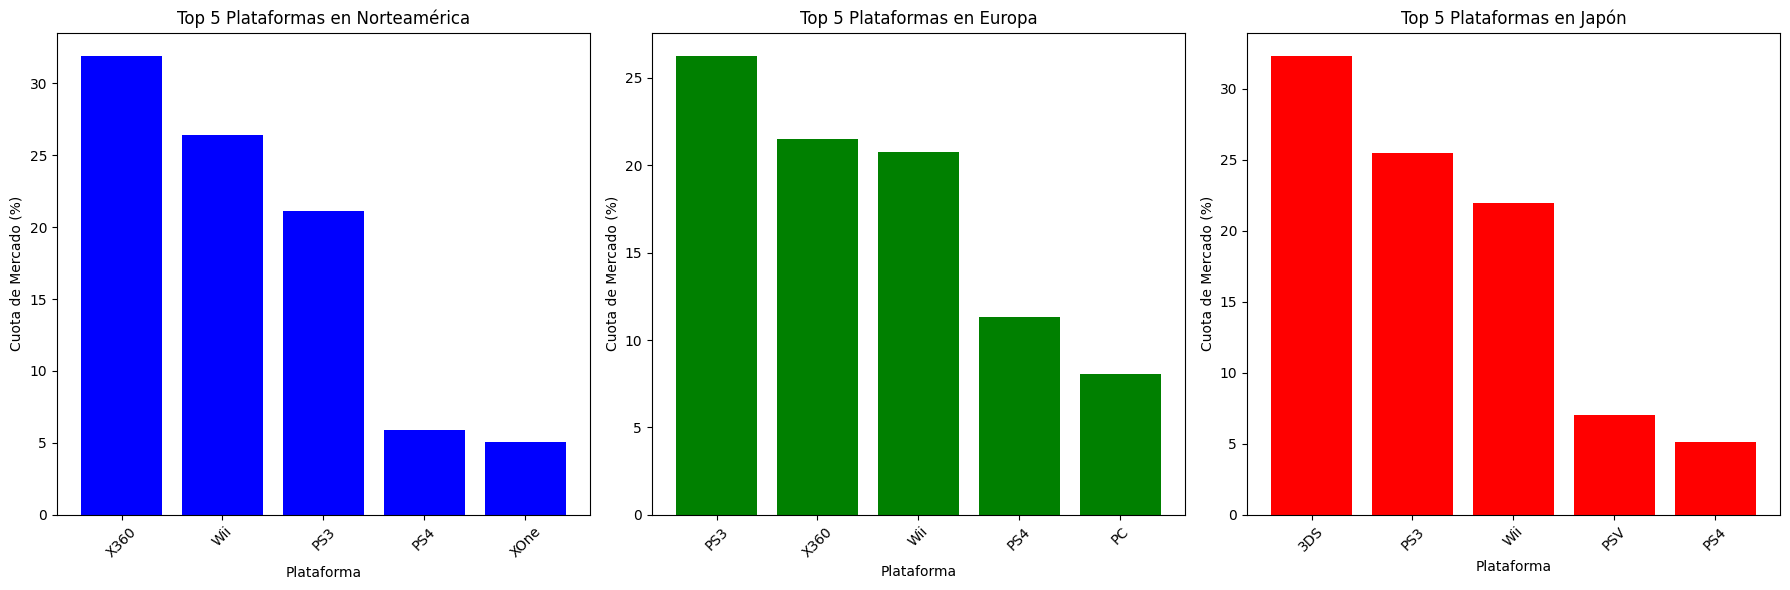

In [45]:
# 4.1 Cinco plataformas principales por región con cuotas de mercado
# Crear los gráficos para las tres regiones
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Norteamérica
axes[0].bar(top_platforms_na.index, top_platforms_na['na_market'], color='blue')
axes[0].set_title('Top 5 Plataformas en Norteamérica')
axes[0].set_ylabel('Cuota de Mercado (%)')
axes[0].set_xlabel('Plataforma')
axes[0].tick_params(axis='x', rotation=45)

# Europa
axes[1].bar(top_platforms_eu.index, top_platforms_eu['eu_market'], color='green')
axes[1].set_title('Top 5 Plataformas en Europa')
axes[1].set_ylabel('Cuota de Mercado (%)')
axes[1].set_xlabel('Plataforma')
axes[1].tick_params(axis='x', rotation=45)

# Japón
axes[2].bar(top_platforms_jp.index, top_platforms_jp['jp_market'], color='red')
axes[2].set_title('Top 5 Plataformas en Japón')
axes[2].set_ylabel('Cuota de Mercado (%)')
axes[2].set_xlabel('Plataforma')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Top 5 de cada plataforma por región :
- Norteamérica : X360, Wii, PS3, PS4, XOne.
- Europa : PS3, X360, Wii, PS4, PC.
- Japón : 3DS, PS3, Wii, PSV, PS4.

### Cinco géneros principales por región

In [46]:
# Agrupar por género y región
genre_sales = df_filtered.groupby(['genre'])[['na_sales', 'eu_sales', 'jp_sales', 'total_sales']].sum()

# Ordenar por región
top_genres_na = genre_sales.sort_values(by='na_sales', ascending=False).head(5)
top_genres_eu = genre_sales.sort_values(by='eu_sales', ascending=False).head(5)
top_genres_jp = genre_sales.sort_values(by='jp_sales', ascending=False).head(5)

# Mostrar resultados como tablas
print("Top 5 géneros en Norteamérica:")
display(top_genres_na[['na_sales']])

print("Top 5 géneros en Europa:")
display(top_genres_eu[['eu_sales']])

print("Top 5 géneros en Japón:")
display(top_genres_jp[['jp_sales']])


Top 5 géneros en Norteamérica:


,na_sales
genre,
Action,416.89
Shooter,352.17
Sports,336.40
Misc,217.19
Role-Playing,138.50


Top 5 géneros en Europa:


,eu_sales
genre,
Action,300.70
Shooter,231.99
Sports,222.21
Misc,111.41
Racing,99.31


Top 5 géneros en Japón:


,jp_sales
genre,
Role-Playing,79.22
Action,73.01
Sports,31.14
Misc,26.26
Platform,22.58


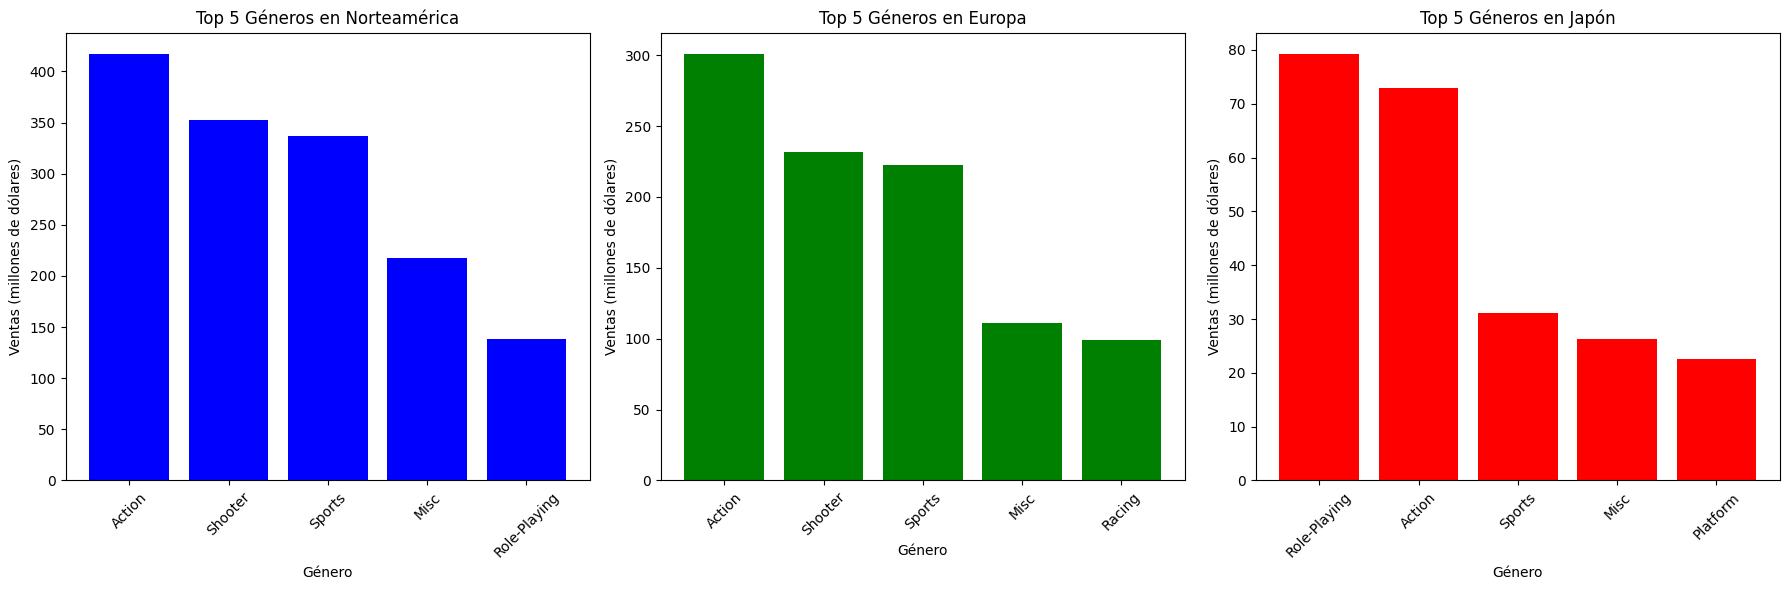

In [47]:
# 4.2 Cinco géneros principales por región
# Crear los gráficos para las tres regiones
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Norteamérica
axes[0].bar(top_genres_na.index, top_genres_na['na_sales'], color='blue')
axes[0].set_title('Top 5 Géneros en Norteamérica')
axes[0].set_ylabel('Ventas (millones de dólares)')
axes[0].set_xlabel('Género')
axes[0].tick_params(axis='x', rotation=45)

# Europa
axes[1].bar(top_genres_eu.index, top_genres_eu['eu_sales'], color='green')
axes[1].set_title('Top 5 Géneros en Europa')
axes[1].set_ylabel('Ventas (millones de dólares)')
axes[1].set_xlabel('Género')
axes[1].tick_params(axis='x', rotation=45)

# Japón
axes[2].bar(top_genres_jp.index, top_genres_jp['jp_sales'], color='red')
axes[2].set_title('Top 5 Géneros en Japón')
axes[2].set_ylabel('Ventas (millones de dólares)')
axes[2].set_xlabel('Género')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Top 5 de cada plataforma por género :
- Norteamérica : Action, Shooter, Sports, Misc, Role-Playing.
- Europa : Action, Shooter, Sports, Misc, Racing.
- Japón : Role-Playing, Action, Sports, Misc, Platform.

### Ventas por clasificación ESRB por región

In [48]:
# Agrupar por clasificación ESRB y región
esrb_sales = df_filtered.groupby(['rating'])[['na_sales', 'eu_sales', 'jp_sales', 'total_sales']].sum()

# Mostrar resultados como tabla
print("Ventas por clasificación ESRB:")
display(esrb_sales)


Ventas por clasificación ESRB:


,na_sales,eu_sales,jp_sales,total_sales
rating,,,,
E,542.20,353.24,78.81,1081.60
E10+,230.87,134.02,13.58,422.00
EC,0.71,0.00,0.00,0.75
M,550.12,387.46,39.63,1109.21
RP,180.81,165.85,126.08,519.44
T,340.66,205.32,53.38,673.20


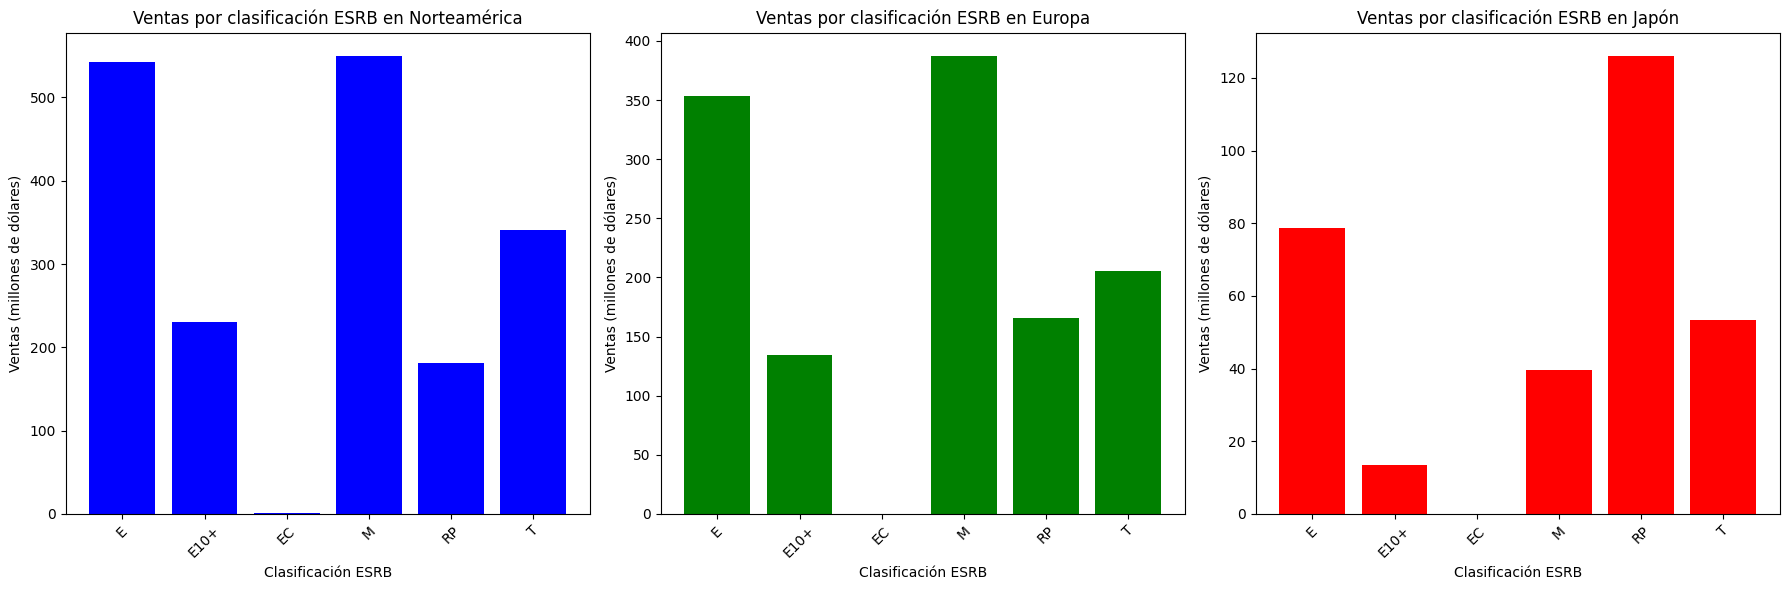

In [49]:
# 4.3 Ventas por clasificación ESRB por región
# Crear el gráfico para las ventas por clasificación ESRB
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Norteamérica
axes[0].bar(esrb_sales.index, esrb_sales['na_sales'], color='blue')
axes[0].set_title('Ventas por clasificación ESRB en Norteamérica')
axes[0].set_ylabel('Ventas (millones de dólares)')
axes[0].set_xlabel('Clasificación ESRB')
axes[0].tick_params(axis='x', rotation=45)

# Europa
axes[1].bar(esrb_sales.index, esrb_sales['eu_sales'], color='green')
axes[1].set_title('Ventas por clasificación ESRB en Europa')
axes[1].set_ylabel('Ventas (millones de dólares)')
axes[1].set_xlabel('Clasificación ESRB')
axes[1].tick_params(axis='x', rotation=45)

# Japón
axes[2].bar(esrb_sales.index, esrb_sales['jp_sales'], color='red')
axes[2].set_title('Ventas por clasificación ESRB en Japón')
axes[2].set_ylabel('Ventas (millones de dólares)')
axes[2].set_xlabel('Clasificación ESRB')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Pruebas de hipótesis

### Calificaciones promedio de los usuarios para las plataformas Xbox One y PC 

*H0:* Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

*H1:* Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC varían significativamente.

*alfa:* 0.05


Primero verificamos la normalidad de los datos con el test de shapiro-wilk.

In [50]:
from scipy.stats import shapiro, ks_2samp

# Filtrar las calificaciones por plataforma
user_score_xone = df_filtered[df_filtered['platform'] == 'XOne']['user_score'].dropna()
user_score_pc = df_filtered[df_filtered['platform'] == 'PC']['user_score'].dropna()


# Test de Shapiro-Wilk para normalidad
shapiro_xone = shapiro(user_score_xone)
shapiro_pc = shapiro(user_score_pc)
print("Shapiro-Wilk XOne:", shapiro_xone)
print("Shapiro-Wilk PC:", shapiro_pc)

# Test de Kolmogorov-Smirnov para normalidad
ks_test = ks_2samp(user_score_xone, user_score_pc)
print("Kolmogorov-Smirnov Test:", ks_test)


Shapiro-Wilk XOne: ShapiroResult(statistic=0.7894643545150757, pvalue=1.5238968099690892e-17)
Shapiro-Wilk PC: ShapiroResult(statistic=0.7839841842651367, pvalue=8.596784213269784e-31)
Kolmogorov-Smirnov Test: KstestResult(statistic=0.16982136149254978, pvalue=3.3910019448276796e-05, statistic_location=7.2, statistic_sign=1)


Para ambas plataformas, los p-valores son muchísimo menores a 0.05 lo que indica que las distribuciones no siguen una distribución normal.

Ambas pruebas muestran que las calificaciones promedio de los usuarios para Xbox One y PC no cumplen con la suposición de normalidad. Por lo tanto, debemos usar una prueba no paramétrica para comparar las calificaciones entre estas dos plataformas.

Las pruebas no paramétricas son métodos estadísticos que no asumen una distribución específica para los datos (como la normalidad). Estas pruebas son útiles cuando los datos no cumplen los supuestos de normalidad o si se trata de escalas ordinales o categóricas. 

In [51]:
from scipy.stats import mannwhitneyu

# Prueba de Mann-Whitney U
mannwhitney_test = mannwhitneyu(user_score_xone, user_score_pc, alternative='two-sided')
print("Mann-Whitney U Test:", mannwhitney_test)



Mann-Whitney U Test: MannwhitneyuResult(statistic=80964.5, pvalue=0.00021760223498281465)


Dado que el p-valor (0.000218) es mucho menor que el nivel de significancia (α=0.05), rechazamos H0.
Hay evidencia estadísticamente significativa para afirmar que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC varían significativamente.

In [52]:
print("Xbox One - Estadísticas descriptivas:")
print(user_score_xone.describe())

print("PC - Estadísticas descriptivas:")
print(user_score_pc.describe())


Xbox One - Estadísticas descriptivas:
count    247.000000
mean       4.542105
std        3.523823
min       -1.000000
25%       -1.000000
50%        6.000000
75%        7.200000
max        9.200000
Name: user_score, dtype: float64
PC - Estadísticas descriptivas:
count    776.000000
mean       5.205541
std        3.453755
min       -1.000000
25%        3.800000
50%        6.700000
75%        7.800000
max        9.300000
Name: user_score, dtype: float64


El promedio de las calificaciones para PC (5.21) es más alto que para Xbox One (4.54).
 La mediana también es mayor para PC (6.70) frente a Xbox One (6.00).
Los valores del rango intercuartil (IQR) de PC (3.80−7.80) son más altos que los de Xbox One (−1.00−7.20).
Las calificaciones promedio y medianas para PC son más altas que para Xbox One. Esto puede indicar una percepción más favorable de los usuarios hacia los juegos en PC.


### Calificaciones promedio de los usuarios para los géneros de Acción y Deportes 

*H0:* Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

*H1:* Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

*alfa:* 0.05

In [53]:
# Filtrar las calificaciones por género
user_score_action = df_filtered[df_filtered['genre'] == 'Action']['user_score'].dropna()
user_score_sports = df_filtered[df_filtered['genre'] == 'Sports']['user_score'].dropna()

# Eliminar valores no válidos (-1)
user_score_action = user_score_action[user_score_action >= 0]
user_score_sports = user_score_sports[user_score_sports >= 0]

# Imprimir estadísticas descriptivas
print("Acción - Estadísticas descriptivas:")
print(user_score_action.describe())
print("\nDeportes - Estadísticas descriptivas:")
print(user_score_sports.describe())


Acción - Estadísticas descriptivas:
count    1078.000000
mean        6.854731
std         1.322434
min         1.600000
25%         6.200000
50%         7.100000
75%         7.800000
max         9.100000
Name: user_score, dtype: float64

Deportes - Estadísticas descriptivas:
count    525.000000
mean       6.210667
std        1.697529
min        0.200000
25%        5.300000
50%        6.600000
75%        7.500000
max        9.000000
Name: user_score, dtype: float64


Aplicamos el test de Shapiro-Wilk para verificar si las distribuciones son normales:

In [54]:


# Test de Shapiro-Wilk
shapiro_action = shapiro(user_score_action)
shapiro_sports = shapiro(user_score_sports)

print("Shapiro-Wilk Acción:", shapiro_action)
print("Shapiro-Wilk Deportes:", shapiro_sports)


Shapiro-Wilk Acción: ShapiroResult(statistic=0.9325074553489685, pvalue=1.1825447546272676e-21)
Shapiro-Wilk Deportes: ShapiroResult(statistic=0.9406794309616089, pvalue=1.2624828211928868e-13)


- Género de acción: p<0.05 por lo que rechazamos la hipótesis de normalidad para las calificaciones del género Acción.
- Género de deportes : p<0.05 por lo que rechazamos la hipótesis de normalidad para las calificaciones del género Deportes.

In [55]:
# Prueba de Mann-Whitney U
mannwhitney_test = mannwhitneyu(user_score_action, user_score_sports, alternative='two-sided')
print("Mann-Whitney U Test:", mannwhitney_test)


Mann-Whitney U Test: MannwhitneyuResult(statistic=345947.5, pvalue=4.4029368601572576e-13)


Dado que el p-valor es mucho menor que el nivel de significancia (0.05) rechazamos la hipótesis nula H0.

Existen diferencias significativas en las calificaciones promedio de los usuarios entre los géneros de Acción y Deportes.

## Conclusión General 

El análisis de los datos de ventas de videojuegos entre 1980 y 2016 nos ha permitido obtener una visión profunda sobre el comportamiento de las plataformas, géneros y clasificaciones ESRB en distintas regiones (Norteamérica, Europa y Japón). A través de diversas técnicas de limpieza de datos, exploración y análisis estadístico, hemos alcanzado los siguientes hallazgos clave:

Se realizó un proceso de limpieza que incluyó la corrección de tipos de datos, el manejo de valores faltantes y la eliminación de filas con valores ausentes significativos (como las columnas name y genre).
Se asignaron valores representativos en columnas como user_score y rating, asegurando que los datos fueran consistentes y listos para el análisis.

Para este análisis se tomo en cuenta las 5 plataformas activas top en vnetas del periodo 2006 al 2016.

El cálculo de las ventas totales permitió observar la distribución de ingresos de videojuegos entre las distintas regiones. El análisis reveló que Norteamérica es una de las regiones con mayores ventas, seguida por Europa y Japón.


Se identificaron las principales plataformas de videojuegos por cuota de mercado en cada región. En Norteamérica, plataformas como la Xbox 360 y la Wii dominaron el mercado durante los años estudiados. En Europa, la PS3 fue la plataforma más destacada, mientras que en Japón, plataformas como la 3DS y la PS3 fueron las más relevantes.


Se observó que, a nivel global, los géneros más populares en términos de ventas fueron los de acción, shooter y deportes. Sin embargo, cada región mostró preferencia por diferentes géneros. Por ejemplo, en Japón, los géneros de rol y plataforma fueron muy destacados, mientras que en Europa y Norteamérica, los juegos de acción y deportes dominaron.


La clasificación ESRB también mostró patrones interesantes. Las categorías como "E" (Apto para todos) y "M" (Mayores de 17 años) dominaron las ventas en Norteamérica, mientras que en Europa y Japón, las clasificaciones variaron ligeramente. La clasificación "RP" (Rating Pending) fue notablemente representada en los datos.
Desafíos y Limitaciones:


El análisis de los videojuegos a través de los años revela que el comportamiento de los consumidores en términos de plataformas, géneros y clasificaciones varía considerablemente por región. Además, las tendencias observadas en las ventas reflejan la influencia de las preferencias culturales y la evolución tecnológica de las plataformas. Para futuros estudios, sería valioso integrar más información sobre las estrategias de marketing, así como evaluar el impacto de los precios de los videojuegos en las ventas.
Este proyecto proporcionó una base sólida para entender los patrones de ventas de videojuegos y ofrece insights útiles para tomar decisiones informadas en la industria de los videojuegos.

